## Assignment 4

### Vishanth Hari Raj 
### 206310279

**Scoring for Customer Acquisition**

**1. Run a logistic regression on the estimation list of 200 persons predicting y as a function
of gender and the seven hotline variables and the intercept (constant) term. Do not eliminate
coefficients which appear statistically insignificant. Hand-in: The score equation
for t from the logistic regression.**

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
est=pd.read_excel('prospectscoringhw.xlsx',sheet_name=0)
hld=pd.read_excel('prospectscoringhw.xlsx',sheet_name=1)

In [4]:
est.head()

Gender  foodwebsites  travelwebsites  restaurantexp  travelexp  \
0       1           302              57             70         63   
1       0           221              57             60         37   
2       0           202              48             25         63   
3       1           148              57             55         63   
4       0            43              57             55         63   

   entertainmentexp  incm  ethnicdivneigh  y  
0                 0     0               0  1  
1                12    26              14  0  
2                 0    13              14  0  
3                 0     0               0  0  
4                 0     0               0  0

In [5]:
hld.head()

Gender  foodwebsites  travelwebsites  restaurantexp  travelexp  \
0       0           158              57             70         63   
1       1           187              57             70         63   
2       1           313              57             45         63   
3       1           310              57             70         63   
4       0            37              48             70         63   

   entertainmentexp  incm  ethnicdivneigh  y  
0                 0    13               0  1  
1                 0     0              29  0  
2                 0     0               0  0  
3                 0     0              14  1  
4                 0     0               0  1

In [6]:
model = smf.logit("y ~ "+'+'.join(est.columns[:-1]), data=est).fit()

Optimization terminated successfully.
         Current function value: 0.579248
         Iterations 6


In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                          Logit   Df Residuals:                      191
Method:                           MLE   Df Model:                            8
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.1135
Time:                        22:24:55   Log-Likelihood:                -115.85
converged:                       True   LL-Null:                       -130.68
Covariance Type:            nonrobust   LLR p-value:                 0.0002419
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -10.3659      2.477     -4.185      0.000     -15.220      -5.511
Gender              -0.0472      0.348     -0.136      0.892      -0.729       0.635
foodwebsites         0.0060      0.002      3.171      0.002       0.002       0.010
travelwebsites       0.0439      0.027      1.624      0.104      -0.009       0.097
restaurantexp        0.0698      0.017      3.994      0.000       0.036       0.104
travelexp            0.0341      0.023      1.517      0.129      -0.010       0.078
entertainmentexp     0.0089      0.027      0.327      0.744      -0.045       0.062
incm                -0.0009      0.018     -0.050      0.960      -0.036       0.034
ethnicdivneigh      -0.0008      0.015     -0.055      0.956      -0.030       0.029
====================================================================================
"""

In [7]:
str(round(model.params.values[0],3))+' '+' + '.join([str(round(model.params.values[i],3))+'*'+str(model.params.index[i]) for i in range(1,len(model.params))])

'-10.366 -0.047*Gender + 0.006*foodwebsites + 0.044*travelwebsites + 0.07*restaurantexp + 0.034*travelexp + 0.009*entertainmentexp + -0.001*incm + -0.001*ethnicdivneigh'

$logit(t) = -10.3659 - 0.0472*Gender + 0.006*FrequencyFoodWebsites + 0.0439*FrequencyTravelWebsites + 0.0698*RestaurantExp + 0.0341*TravelExp + 0.0089*EntertainmentExp - 0.0009*Income - 0.0008*Ethnicity$ 

**2. Evaluate the score function for each person in the holdout list of 300 persons. Based on
this, compute the following for each person: (1) the predicted response probability r, (2)
the consequent lift, which is obtained by dividing the predicted response probability by
the average response rate in the estimation list. No Hand-in.**

In [8]:
hld['predict']=model.predict(hld)
hld.predict

0      0.525970
1      0.554112
2      0.320354
3      0.723885
4      0.268740
         ...   
295    0.251233
296    0.073607
297    0.723784
298    0.272157
299    0.361369
Name: predict, Length: 300, dtype: float64

In [9]:
hld['lift']=hld.predict/est.y.mean()
hld.lift

0      1.461026
1      1.539201
2      0.889874
3      2.010792
4      0.746499
         ...   
295    0.697870
296    0.204465
297    2.010512
298    0.755993
299    1.003803
Name: lift, Length: 300, dtype: float64

In [43]:
hld

Gender  foodwebsites  travelwebsites  restaurantexp  travelexp  \
0         0           158              57             70         63   
1         1           187              57             70         63   
2         1           313              57             45         63   
3         1           310              57             70         63   
4         0            37              48             70         63   
..      ...           ...             ...            ...        ...   
295       1           141              57             55         63   
296       0           232              48             50         26   
297       0           302              57             70         63   
298       0            84              42             70         63   
299       1           385              48             60         37   

     entertainmentexp  incm  ethnicdivneigh  y   predict      lift  
0                   0    13               0  1  0.525970  1.461026  
1                   0     0              29  0  0.554112  1.539201  
2                   0     0               0  0  0.320354  0.889874  
3                   0     0              14  1  0.723885  2.010792  
4                   0     0               0  1  0.268740  0.746499  
..                ...   ...             ... ..       ...       ...  
295                 0    13               0  0  0.251233  0.697870  
296                 0    26              14  0  0.073607  0.204465  
297                 0     0              14  1  0.723784  2.010512  
298                 0     0               0  0  0.272157  0.755993  
299                 0     0              14  0  0.361369  1.003803  

[300 rows x 11 columns]

**Q3. Sort all the 300 persons in the holdout list in decreasing order of lift as is done in slide
30.**

In [41]:
hld.sort_values('lift',ascending=False).head(300)

Gender  foodwebsites  travelwebsites  restaurantexp  travelexp  \
131       1           317              57             70         63   
243       0           321              57             70         63   
191       0           315              57             70         63   
159       0           311              57             70         63   
19        1           314              57             70         63   
..      ...           ...             ...            ...        ...   
211       0           406              39              0         63   
152       0           291              39             10         52   
96        0           159              57             15         41   
285       1           354              30             10         52   
34        0           382              30             10         41   

     entertainmentexp  incm  ethnicdivneigh  y   predict      lift  
131                12    26               0  1  0.750384  2.084399  
243                 0    28               0  0  0.743278  2.064661  
191                 0     0              14  1  0.739021  2.052836  
159                 0     0               0  1  0.736668  2.046299  
19                  0     0               0  1  0.730938  2.030384  
..                ...   ...             ... ..       ...       ...  
211                 0    26               0  0  0.016224  0.045067  
152                 0     0              28  0  0.011335  0.031487  
96                  0    26               0  0  0.011060  0.030722  
285                 0     0               0  0  0.010868  0.030188  
34                  0    13              14  0  0.009051  0.025141  

[300 rows x 11 columns]

**Q4. Plot the curve for marginal response rate vs number of solicitations made, like in the
chart that appears on slide 31. The “marginal response rate” of the person at rank n is
the nth-highest predicted response probability r. The plot should have the rank on the
horizontal axis and the corresponding r on the vertical axis.**

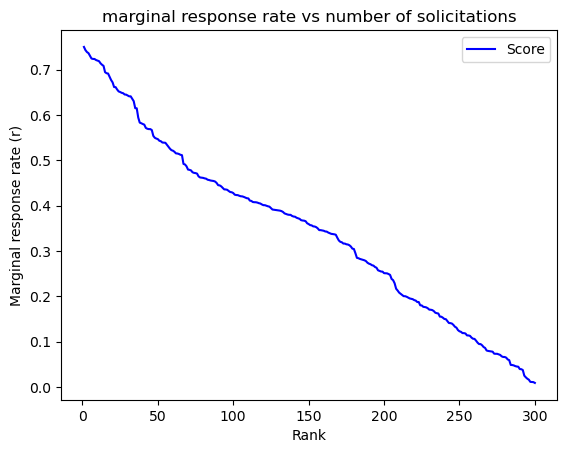

In [19]:
plt_hld=hld.sort_values('predict',ascending=False).reset_index()
plt.plot(plt_hld.index + 1, plt_hld.predict, color='blue', linewidth=1.5)
plt.xlabel('Rank')
plt.ylabel('Marginal response rate (r)')
plt.title('marginal response rate vs number of solicitations')
plt.legend(['Score'])
plt.show()

**5. Suppose average LT Customer equity is \\$30, and the solicitation cost is \\$12. Use the
marginal cost rule to calculate how many of the best prospects in the holdout listMelrose
should contact. Hand-in: your calculations and final answer.**

In [22]:
sol_cost=12
equity=30
m=sol_cost/equity
m

0.4

Let p is given by solicitation cost/equity. In this case solicitation cost is USD 12 and equity was USD 30. 
$p_n = \frac{solicitation\_cost}{equity}$

$p_n = \frac{12}{30} $

Now
$p_n > 0.4 $

In [26]:
num = len(plt_hld[plt_hld.predict>(m)]) # 121 people
print("No of prospects holdout list that Melrose Chocolate House should contact", num,)

No of prospects holdout list that Melrose Chocolate House should contact 121


**Q6. Compute the cumulative sum (aka running sum) of the predicted response probability
r when the persons are sorted as in Question 3. This cumulative sum at rank n gives
the expected number of conversions or positive responses if the firm were to contact
the n customers with the highest r. Plot the curve of the expected number of positive
responses vs number of solicitations made, like in the chart that appears on slide 33.
You will notice that the curve does not rise as fast as one would expect from the usual
80/20 rule. Explain why the curve might be of this shape here.**

In [24]:
plt_hld['pred_sum']=np.cumsum(plt_hld.predict)

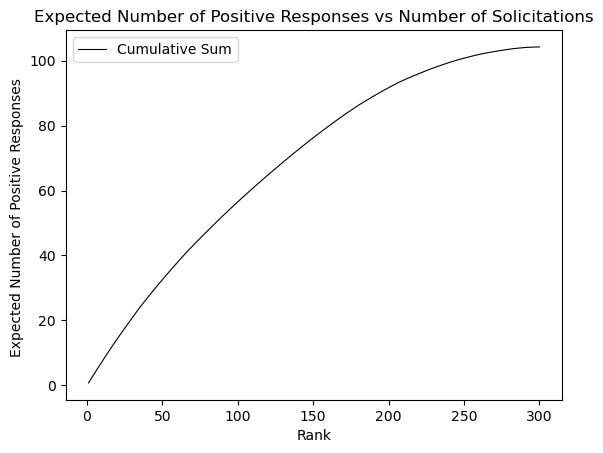

In [44]:
plt.plot(
    plt_hld.index + 1,
    plt_hld.pred_sum,
    color='black',
    linewidth=0.8
)
plt.xlabel('Rank')
plt.ylabel('Expected Number of Positive Responses ')
plt.title('Expected Number of Positive Responses vs Number of Solicitations')
plt.legend(['Cumulative Sum'])
plt.show()

**7. Assume that the firm has enough raw Belgian chocolate to make only 40 boxes of the
pralines offered as part of the introductory offer. Use the limited supply rule to calculate
how many of the best prospects in the holdout list Melrose should send solicitations to.
Hand-in: your calculations and final answer.**

In [31]:
plt_hld[plt_hld.pred_sum<=40]

index  Gender  foodwebsites  travelwebsites  restaurantexp  travelexp  \
0     131       1           317              57             70         63   
1     243       0           321              57             70         63   
2     191       0           315              57             70         63   
3     159       0           311              57             70         63   
4      19       1           314              57             70         63   
..    ...     ...           ...             ...            ...        ...   
59     91       1           163              57             70         63   
60    257       0           129              57             70         63   
61    143       0           254              57             60         63   
62     55       1           159              57             70         63   
63    178       0           211              57             70         52   

    entertainmentexp  incm  ethnicdivneigh  y   predict      lift   pred_sum  
0                 12    26               0  1  0.750384  2.084399   0.750384  
1                  0    28               0  0  0.743278  2.064661   1.493662  
2                  0     0              14  1  0.739021  2.052836   2.232683  
3                  0     0               0  1  0.736668  2.046299   2.969351  
4                  0     0               0  1  0.730938  2.030384   3.700289  
..               ...   ...             ... ..       ...       ...        ...  
59                 0     0              15  0  0.521434  1.448428  37.876768  
60                15     0               0  0  0.519059  1.441831  38.395828  
61                12    13              28  1  0.515515  1.431985  38.911342  
62                 0    15               0  0  0.515219  1.431164  39.426562  
63                 0     0               0  1  0.514087  1.428019  39.940648  

[64 rows x 13 columns]

In [33]:
plt_hld[plt_hld.pred_sum<=41]

index  Gender  foodwebsites  travelwebsites  restaurantexp  travelexp  \
0     131       1           317              57             70         63   
1     243       0           321              57             70         63   
2     191       0           315              57             70         63   
3     159       0           311              57             70         63   
4      19       1           314              57             70         63   
..    ...     ...           ...             ...            ...        ...   
61    143       0           254              57             60         63   
62     55       1           159              57             70         63   
63    178       0           211              57             70         52   
64    293       0           198              57             70         52   
65     21       1           461              39             60         52   

    entertainmentexp  incm  ethnicdivneigh  y   predict      lift   pred_sum  
0                 12    26               0  1  0.750384  2.084399   0.750384  
1                  0    28               0  0  0.743278  2.064661   1.493662  
2                  0     0              14  1  0.739021  2.052836   2.232683  
3                  0     0               0  1  0.736668  2.046299   2.969351  
4                  0     0               0  1  0.730938  2.030384   3.700289  
..               ...   ...             ... ..       ...       ...        ...  
61                12    13              28  1  0.515515  1.431985  38.911342  
62                 0    15               0  0  0.515219  1.431164  39.426562  
63                 0     0               0  1  0.514087  1.428019  39.940648  
64                12    13              29  0  0.512415  1.423375  40.453063  
65                12    56              28  0  0.511533  1.420925  40.964596  

[66 rows x 13 columns]

In [34]:
# Solicit to 64 people, as expected no. of returns would be almost 40
num2 = plt_hld[[math.isclose(plt_hld.pred_sum[i],40,abs_tol=0.1) for i in range(len(plt_hld))]].index[0]+1
print("Melrose Chocolate House should contact", num2)


Melrose Chocolate House should contact 64


**Q8. To test how well the scoring model predicts actual performance, Melrose sent the solicitation offer to all 300 persons on the holdout list. The actual response is available as
the y variable in the holdout list data part of the spreadsheet. Compute the cumulative
sum (aka running sum) for this y variable when the persons are sorted as in Question
3. The cumulative sum of y at rank n gives the total actual number of conversions or
positive responses when the firm contacted the n customers with the highest r. Plot this
cumulative sum vs the number of solicitations made. Superimpose on this the curve
obtained in step 6 above to get a chart akin to slide 44 . Based on this chart, comment on
the discrepancies between the actual responses and the predicted response probabilities
for the prospects. Comment also on the consequent impact on the decision made in step
7 above**

In [36]:
plt_hld['y_sum']=np.cumsum(plt_hld.y)

In [37]:
plt_hld.y_sum

0        1
1        1
2        2
3        3
4        4
      ... 
295    100
296    100
297    100
298    100
299    100
Name: y_sum, Length: 300, dtype: int64

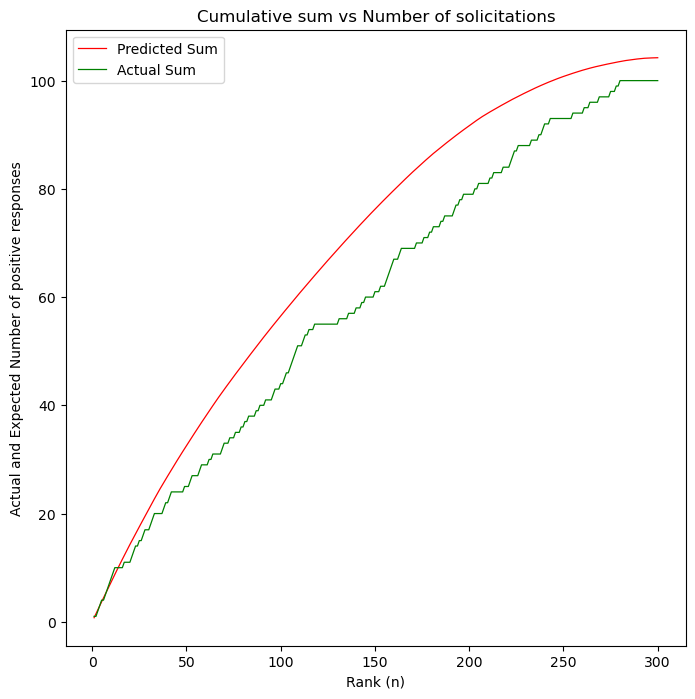

In [40]:
plt.figure(figsize=(8, 8))

plt.plot(plt_hld.index + 1, plt_hld.pred_sum, color='red', linewidth=0.9, label='Predicted Sum')
plt.plot(plt_hld.index + 1, plt_hld.y_sum, color='green', linewidth=0.9, label='Actual Sum')

plt.xlabel('Rank (n)')
plt.ylabel('Actual and Expected Number of positive responses')
plt.title('Cumulative sum vs Number of solicitations')
plt.legend()
plt.show()

Q9

Assume P as the total number of prospects and C as the total number of conversions.

$ Lift_i = {r_i \over Average\ Response\ Rate} $

$ Average\ Response\ Rate = {C \over P} $

$ Lift_i = {r_i \over (C/P)} $

$ Average Lift = {(1/n) \sum_{k=1}^n r_k \over (C/P)} $
where n is the period for which we want to define our average lift

Given the Pareto rule, we know that 80% of conversions, happen with just 20% of prospects  
20%P gives 80%C

Using this rule, we can directly obtain the average probability of conversion for the top 20% of prospects or the numerator of equation 4 for the same:

$ 0.8C/0.2P = Average\ Probability\ of\ conversion = {(1/n) \sum_{k=1}^{0.2P} r_k} $

This implies that:

$ Average\ Lift = {(0.8C/0.2P) \over (C/P)} = 4 $, for the top 20% of prospects